# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint


import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

605

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty lists to fill API data.
city_name=[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [23]:
def get_weather(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q":city
    }
    r = requests.get(url,params=payload)
    if r.status_code == 200:
        return r.json()
    else: 
        return None

In [6]:
all_cities_json = []
for city in cities:
    result = get_weather(city,api_key)
    if result: 
        all_cities_json.append(result)
        

In [41]:
# all json format of cities.
all_cities_json[0:2]

[{'coord': {'lon': -37.64, 'lat': 65.61},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'base': 'stations',
  'main': {'temp': 263.15,
   'feels_like': 258.12,
   'temp_min': 263.15,
   'temp_max': 263.15,
   'pressure': 1011,
   'humidity': 47},
  'wind': {'speed': 2.1, 'deg': 150},
  'clouds': {'all': 49},
  'dt': 1577139407,
  'sys': {'type': 1,
   'id': 81,
   'country': 'GL',
   'sunrise': 1577105751,
   'sunset': 1577116983},
  'timezone': -10800,
  'id': 3424607,
  'name': 'Tasiilaq',
  'cod': 200},
 {'coord': {'lon': 147.06, 'lat': -42.78},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 287.07,
   'feels_like': 283.8,
   'temp_min': 285.93,
   'temp_max': 289.26,
   'pressure': 1023,
   'humidity': 62},
  'visibility': 10000,
  'wind': {'speed': 3.6, 'deg': 190},
  'clouds': {'all': 75},
  'dt': 1577139330,
  'sys': {

In [36]:
print("Begining Data Retrieval")
print('-'*29)
num = 1
for e in range(len(all_cities_json)):
    city_name.append(all_cities_json[e]['name'])
    country.append(all_cities_json[e]['sys']['country'])
    humidity.append(all_cities_json[e]['main']['humidity'])
    date.append(all_cities_json[e]['dt'])
    lat.append(all_cities_json[e]['coord']['lat'])
    lng.append(all_cities_json[e]['coord']['lon'])
    max_temp.append(all_cities_json[e]['main']['temp_max'])
    wind_speed.append(all_cities_json[e]['wind']['speed'])
    try:
#         print(f"Procssing Record {num} of Set 1 | {cities[e]}")
        num += 1
    except:
        print("City not found. Skipping...")
    continue
    
print('-'*35)
print("Data Retrieval Complete")
print('-'*35)

Begining Data Retrieval
-----------------------------
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict ={
    "City": city_name,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed    
}

In [10]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tasiilaq,GL,1577139407,47,65.61,-37.64,263.15,2.10
1,New Norfolk,AU,1577139330,62,-42.78,147.06,289.26,3.60
2,Barrow,AR,1577139407,15,-38.31,-60.23,307.99,9.59
3,Kamenka,MD,1577139407,92,48.03,28.70,282.04,0.45
4,Cape Town,ZA,1577139387,82,-33.93,18.42,290.93,2.60


In [11]:
weather_df.count()

City          547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [12]:
# save the weather_df to 
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
weather_Max_f = (weather_df["Max Temp"]-273.15)*(9/5)+32
# (278K − 273.15) × 9/5 + 32

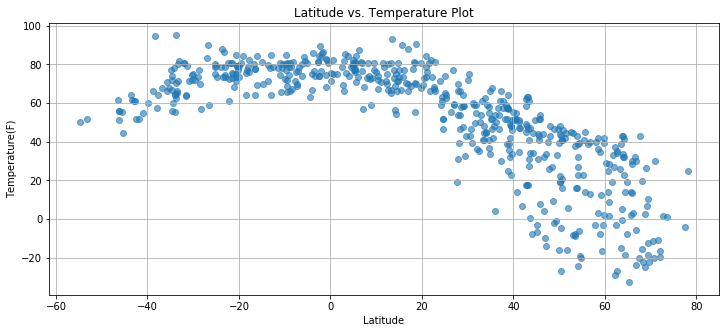

In [70]:
plt.figure(figsize=(12,5))
plt.title('Latitude vs. Temperature Plot')
plt.scatter(weather_df['Lat'],weather_Max_f, marker = "o",alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Temperature"+'(F)')
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

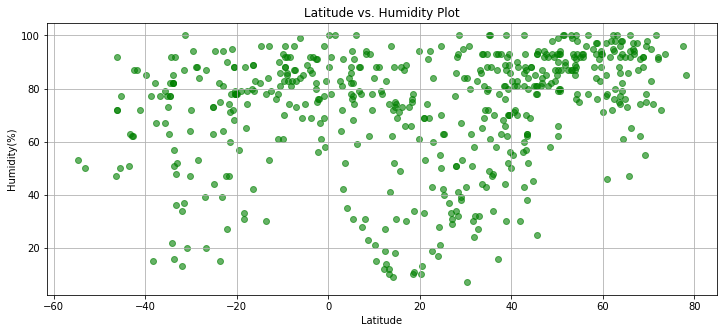

In [77]:
plt.figure(figsize=(12,5))
plt.title('Latitude vs. Humidity Plot')
plt.scatter(weather_df['Lat'],weather_df['Humidity'], marker = "o",alpha=.6, color="g")
plt.xlabel("Latitude")
plt.ylabel("Humidity"+'(%)')
plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

In [ ]:
# plt.title('Latitude vs. Cloudiness Plot')
# plt.scatter(weather_df['Lat'],weather_df['cloudiness'], marker = "o")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness"+'(%)')
# plt.grid(True)
# plt.show()

#### Latitude vs. Wind Speed Plot

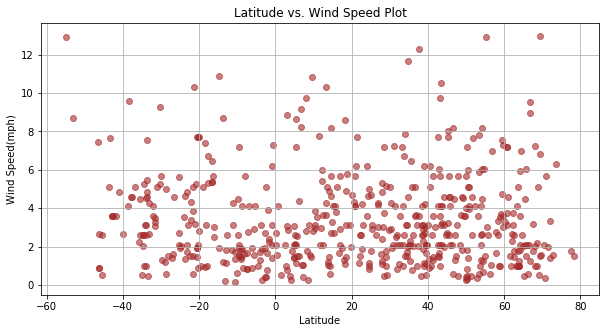

In [79]:
plt.figure(figsize=(10,5))
plt.title('Latitude vs. Wind Speed Plot')
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker = "o",alpha=.6, color='brown')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed"+'(mph)')
plt.grid(True)
plt.show()